#Checkpoint-1

1. Data Cleaning:

In [12]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fakereviewdata-processed-csv/fakeReviewData_processed.csv
/kaggle/input/fakereviewdata/fakeReviewData.csv


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt')
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec

[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>


In [14]:
url = '/kaggle/input/fakereviewdata/fakeReviewData.csv'
data = pd.read_csv(url)

In [15]:
data.head(15)

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...
5,Home_and_Kitchen_5,3.0,CG,I WANTED DIFFERENT FLAVORS BUT THEY ARE NOT.
6,Home_and_Kitchen_5,5.0,CG,They are the perfect touch for me and the only...
7,Home_and_Kitchen_5,3.0,CG,These done fit well and look great. I love th...
8,Home_and_Kitchen_5,5.0,CG,"Great big numbers & easy to read, the only thi..."
9,Home_and_Kitchen_5,5.0,CG,My son loves this comforter and it is very wel...


In [16]:
data.isnull().sum()

category    0
rating      0
label       0
text_       0
dtype: int64

In [17]:
data.duplicated().sum()

12

In [18]:
data.drop_duplicates(inplace=True)

In [19]:
data.duplicated().sum()

0

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40420 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40420 non-null  object 
 1   rating    40420 non-null  float64
 2   label     40420 non-null  object 
 3   text_     40420 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.5+ MB


In [21]:
data.describe()

,rating
count,40420.000000
mean,4.256358
std,1.144452
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [22]:
data.shape

(40420, 4)

In [23]:
data['label'].value_counts() # data is not skewed we have almost equal of both types

label
OR    20215
CG    20205
Name: count, dtype: int64

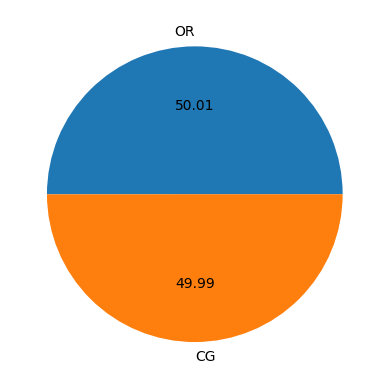

In [24]:
plt.pie(data['label'].value_counts(), labels=['OR', 'CG'], autopct="%0.2f")
plt.show() #Data is imbalanced with high percent of ham and less percent of spam

In [25]:
print(data['rating'].value_counts())

rating
5.0    24547
4.0     7965
3.0     3786
1.0     2155
2.0     1967
Name: count, dtype: int64


In [26]:
data['category'].value_counts()

category
Kindle_Store_5                  4728
Books_5                         4369
Pet_Supplies_5                  4251
Home_and_Kitchen_5              4056
Electronics_5                   3988
Sports_and_Outdoors_5           3944
Tools_and_Home_Improvement_5    3858
Clothing_Shoes_and_Jewelry_5    3847
Toys_and_Games_5                3792
Movies_and_TV_5                 3587
Name: count, dtype: int64

# Feature Creation

- Number of characters
- Number of Words
- Number of sentences

In [27]:
data['num_char'] = data['text_'].apply(len)
data.head()

,category,rating,label,text_,num_char
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor...",75
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I...",80
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...,67
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i...",81
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...,85


In [28]:
data['num_words'] = data['text_'].apply(lambda x: len(nltk.word_tokenize(x)))
data.head()

,category,rating,label,text_,num_char,num_words
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor...",75,18
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I...",80,19
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...,67,16
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i...",81,19
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...,85,20


In [29]:
data['num_sentences'] = data['text_'].apply(lambda x:len(nltk.sent_tokenize(x)))
data.head()

,category,rating,label,text_,num_char,num_words,num_sentences
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor...",75,18,3
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I...",80,19,2
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...,67,16,2
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i...",81,19,2
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...,85,20,3


In [30]:
data.sample(10)

,category,rating,label,text_,num_char,num_words,num_sentences
16793,Tools_and_Home_Improvement_5,5.0,CG,"Great little light. Puts out a nice, wide beam...",101,25,3
2683,Home_and_Kitchen_5,1.0,OR,I would give this zero stars if I could. It o...,294,64,6
9632,Electronics_5,5.0,OR,A small external drive that backs up my comput...,184,38,2
841,Home_and_Kitchen_5,2.0,OR,Very small and flimsy looking bag. The product...,116,22,3
16128,Tools_and_Home_Improvement_5,4.0,OR,Great but I wish the pads were rubbery. The sl...,82,18,2
17705,Tools_and_Home_Improvement_5,4.0,OR,Installation was easy. The faucet looks great....,253,55,4
37659,Clothing_Shoes_and_Jewelry_5,5.0,OR,"Lightweight, well tailored. Nice Fabric. Have ...",123,26,4
19429,Tools_and_Home_Improvement_5,5.0,OR,"ups dollied it up to my garage door, and rolle...",1736,383,26
27522,Kindle_Store_5,3.0,OR,Copy courtesy of Netgalley\nStand alone -HEA\n...,827,168,15
4338,Sports_and_Outdoors_5,5.0,CG,"Just a great sock. Not a bad quality, just no...",73,19,2


In [31]:
data[['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,40420.000000,40420.000000,40420.000000
mean,351.321227,76.631420,5.275111
std,369.850284,79.171578,4.914134
min,24.000000,2.000000,1.000000
25%,107.000000,23.750000,2.000000
50%,198.000000,44.000000,3.000000
75%,439.000000,96.000000,6.000000
max,2827.000000,510.000000,133.000000


Analyze separately

In [32]:
print('Computer Generated')
data[data['label']=='CG'][['num_char','num_words','num_sentences']].describe()

Computer Generated


,num_char,num_words,num_sentences
count,20205.000000,20205.000000,20205.000000
mean,305.646523,69.198218,5.454838
std,307.089932,69.607012,5.306643
min,24.000000,2.000000,1.000000
25%,96.000000,21.000000,2.000000
50%,174.000000,39.000000,3.000000
75%,383.000000,87.000000,7.000000
max,1717.000000,344.000000,133.000000


In [33]:
print('Human Written')
data[data['label']=='OR'][['num_char','num_words','num_sentences']].describe()

Human Written


,num_char,num_words,num_sentences
count,20215.000000,20215.000000,20215.000000
mean,396.973337,84.060945,5.095474
std,418.438191,87.065028,4.480578
min,28.000000,7.000000,1.000000
25%,121.000000,26.000000,2.000000
50%,224.000000,48.000000,4.000000
75%,498.000000,106.000000,6.000000
max,2827.000000,510.000000,51.000000


Human written have more avg number of characters and words,

But computer generated has more sentences

- Conclusion, original reviews are not of complete sentences but are long enough with less grammar

Now here we convert the label column to target and assign

0 -> Original Reviews(OR)

1 -> Computer Generated(Cg)

In [34]:
data.rename(columns={'label':'target'}, inplace=True)

In [35]:
data.head()

,category,rating,target,text_,num_char,num_words,num_sentences
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor...",75,18,3
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I...",80,19,2
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...,67,16,2
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i...",81,19,2
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...,85,20,3


In [36]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [37]:
data['target'] = encoder.fit_transform(data['target']) #CG -> 0 and OR -> 1
data.head()

,category,rating,target,text_,num_char,num_words,num_sentences
0,Home_and_Kitchen_5,5.0,0,"Love this! Well made, sturdy, and very comfor...",75,18,3
1,Home_and_Kitchen_5,5.0,0,"love it, a great upgrade from the original. I...",80,19,2
2,Home_and_Kitchen_5,5.0,0,This pillow saved my back. I love the look and...,67,16,2
3,Home_and_Kitchen_5,1.0,0,"Missing information on how to use it, but it i...",81,19,2
4,Home_and_Kitchen_5,5.0,0,Very nice set. Good quality. We have had the s...,85,20,3


<Axes: >

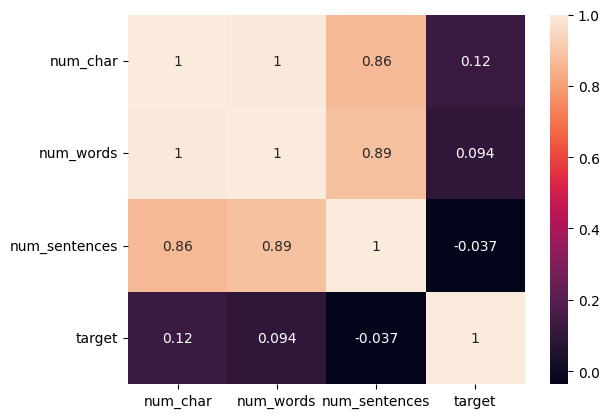

In [38]:
sns.heatmap(data[['num_char','num_words','num_sentences','target']].corr(), annot=True)

From here on I have two approaches
- Take only number of characters/number of words which show that as they are highly co-related and for original reviews mean of number of characters/words were higher than the computer generated

- Take only number of sentences, as the mean of num_sentences is higher for computer generated ones

# Text Pre-processing
- Lowercase
- Tokenisation
- Remove Special Characters
- Remove stopwords and punctuation
- Stemming/lemmating

In [39]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


False

In [40]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

[nltk_data] Error loading wordnet: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>


In [41]:
from nltk import PorterStemmer
ps = PorterStemmer()

In [42]:
import string
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
  transformed = []

  for word in text:
    if word.isalnum() and word not in stopwords.words('english') and word not in string.punctuation:
      transformed.append(ps.stem(word))


  return " ".join(transformed)

In [34]:
transform_text("I am ||||| ??? &a good boy is rocking in racing and running with high speeds") #with lemmatizer

'good boy rocking racing running high speed'

In [43]:
transform_text("I am ||||| ??? &a good boy is rocking in racing and running with high speeds") #with stemmer

'good boy rock race run high speed'

For now going with stemmer

In [44]:
data['transformed_text'] = data['text_'].apply(transform_text)
data.head()

,category,rating,target,text_,num_char,num_words,num_sentences,transformed_text
0,Home_and_Kitchen_5,5.0,0,"Love this! Well made, sturdy, and very comfor...",75,18,3,love well made sturdi comfort love pretti
1,Home_and_Kitchen_5,5.0,0,"love it, a great upgrade from the original. I...",80,19,2,love great upgrad origin mine coupl year
2,Home_and_Kitchen_5,5.0,0,This pillow saved my back. I love the look and...,67,16,2,pillow save back love look feel pillow
3,Home_and_Kitchen_5,1.0,0,"Missing information on how to use it, but it i...",81,19,2,miss inform use great product price
4,Home_and_Kitchen_5,5.0,0,Very nice set. Good quality. We have had the s...,85,20,3,nice set good qualiti set two month


In [ ]:
data.to_csv('fakeReviewData_processed.csv', index=False)

In [45]:
data.isnull().sum()

category            0
rating              0
target              0
text_               0
num_char            0
num_words           0
num_sentences       0
transformed_text    0
dtype: int64

# Checkpoint-2

Now we will create a wordcloud to see the most frequent words, don't know why I am actually doing but I hope will get some clue

In [55]:
from wordcloud import WordCloud
wc = WordCloud(width=1000, height=1000, min_font_size=10, background_color='white')

In [47]:
cg_wc = wc.generate(data[data['target'] == 0]['transformed_text'].str.cat(sep=" "))

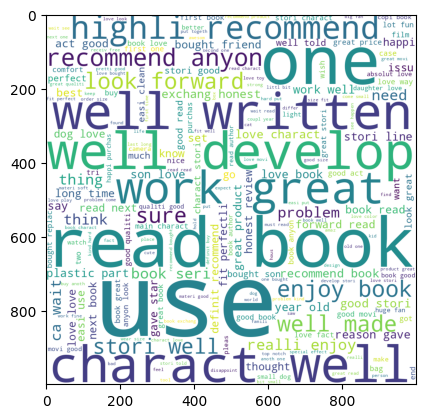

In [48]:
plt.imshow(cg_wc)

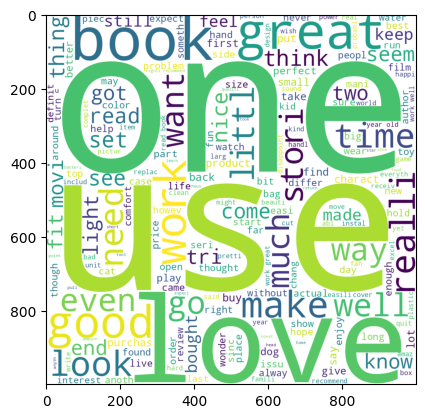

In [49]:
or_wc = wc.generate(data[data['target'] == 1]['transformed_text'].str.cat(sep=" "))
plt.imshow(or_wc)

In [50]:
or_corpus =[]
for review in data[data['target'] == 1]['transformed_text'].tolist():
  for word in review.split():
    or_corpus.append(word)

In [51]:
from collections import Counter
pd.DataFrame(Counter(or_corpus).most_common(30))

,0,1
0,one,7332
1,book,6370
2,love,6345
3,like,6280
4,use,6121
5,great,5807
6,get,4839
7,good,4795
8,would,4673
9,work,4589


In [52]:
cg_corpus =[]
for review in data[data['target'] == 0]['transformed_text'].tolist():
  for word in review.split():
    cg_corpus.append(word)

In [53]:
pd.DataFrame(Counter(cg_corpus).most_common(30))

,0,1
0,love,12721
1,book,10953
2,great,10795
3,good,9451
4,one,7285
5,read,7168
6,stori,6975
7,use,6510
8,like,6468
9,would,6091


In [54]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
tfidf = TfidfVectorizer() #try with different values
cv = CountVectorizer()

In [56]:
X = tfidf.fit_transform(data['transformed_text']).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [57]:
X.shape

(40420, 27154)

In [58]:
y = data['target'].values

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [61]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [62]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.7074468085106383
[[3476  522]
 [1843 2243]]
0.8112115732368896


In [63]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.8344878772884711
[[3569  429]
 [ 909 3177]]
0.8810316139767055


In [65]:
import pickle
pickle.dump(mnb, open('modelMNB.pkl', 'wb'))

In [64]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.7215487382483918
[[3754  244]
 [2007 2079]]
0.8949634093844167


In [66]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=2)

In [67]:
rf.fit(X_train, y_train)
y_pred4 = rf.predict(X_test)
print(accuracy_score(y_test, y_pred4))
print(confusion_matrix(y_test, y_pred4))
print(precision_score(y_test, y_pred4))

0.8469816922315685
[[3577  421]
 [ 816 3270]]
0.8859387699810349


In [68]:
pickle.dump(rf, open('modelRf.pkl', 'wb'))

In [69]:
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))